In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(rc={'axes.facecolor': (0, 0, 0, 0), 'figure.facecolor': (0, 0, 0, 0)})

In [ ]:
# # 데이터 다운로드
# !wget https://raw.githubusercontent.com/suparklingmin/LingDataSci2024/refs/heads/main/data/vowel/all-f0.csv
# !wget https://raw.githubusercontent.com/suparklingmin/LingDataSci2024/refs/heads/main/data/vowel/female-f0-vot.csv

# # 디렉토리 생성 및 파일 이동
# !mkdir -p ../data/vowel
# !mv all-f0.csv ../data/vowel/
# !mv female-f0-vot.csv ../data/vowel/

--2025-09-19 03:11:53--  https://raw.githubusercontent.com/suparklingmin/LingDataSci2024/refs/heads/main/data/vowel/all-f0.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9706 (9.5K) [text/plain]
Saving to: ‘all-f0.csv’

all-f0.csv          100%[===================>]   9.48K  --.-KB/s    in 0s      

2025-09-19 03:11:53 (71.8 MB/s) - ‘all-f0.csv’ saved [9706/9706]

--2025-09-19 03:11:54--  https://raw.githubusercontent.com/suparklingmin/LingDataSci2024/refs/heads/main/data/vowel/female-f0-vot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response.

In [15]:
# CSV 파일을 DataFrame으로 읽기
df = pd.read_csv('../data/vowel/f0.csv', index_col='sid')

# 처음 5개 행 확인
df.head()


,age,gender,f0
sid,,,
s001,20s,female,196.222840
s002,20s,female,225.341426
s003,20s,female,210.832895
s004,20s,female,234.302582
s005,20s,female,193.576549


In [16]:
# 데이터프레임 크기
print(f"Data size: {df.shape}")
# 출력: (행 개수, 열 개수)

# 데이터타입 및 메모리 사용량
df.info()

# 열 이름 확인
print(df.columns.tolist())

# 인덱스 정보
print(df.index)


Data size: (300, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, s001 to s300
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     300 non-null    object 
 1   gender  300 non-null    object 
 2   f0      300 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.4+ KB
['age', 'gender', 'f0']
Index(['s001', 's002', 's003', 's004', 's005', 's006', 's007', 's008', 's009',
       's010',
       ...
       's291', 's292', 's293', 's294', 's295', 's296', 's297', 's298', 's299',
       's300'],
      dtype='object', name='sid', length=300)


In [17]:
# 수치형 변수의 기술통계
df.describe()

# 범주형 변수의 빈도
df['gender'].value_counts()

gender
male          139
female        136
non-binary     25
Name: count, dtype: int64

age       0
gender    0
f0        1
dtype: int64
age       0.000000
gender    0.000000
f0        0.333333
dtype: float64


Text(0.5, 1.0, 'Missing Data Patterns')

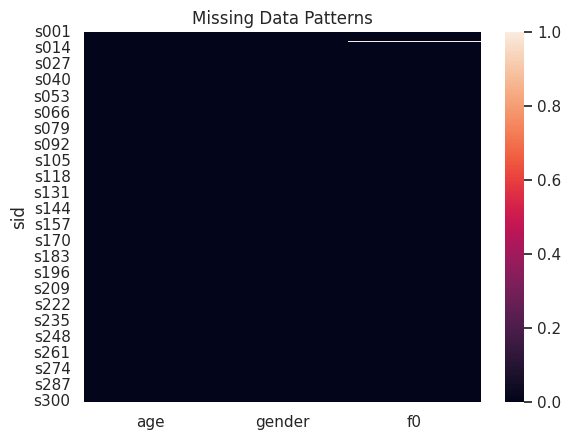

In [18]:
df.loc['s008', 'f0'] = np.nan

# 열별 결측값 개수
print(df.isnull().sum())

# 결측값 비율
print(df.isnull().mean() * 100)

# 결측값 시각화
sns.heatmap(
    df.isnull(), cbar=True
)
plt.title('Missing Data Patterns')

Text(0, 0.5, 'Frequency')

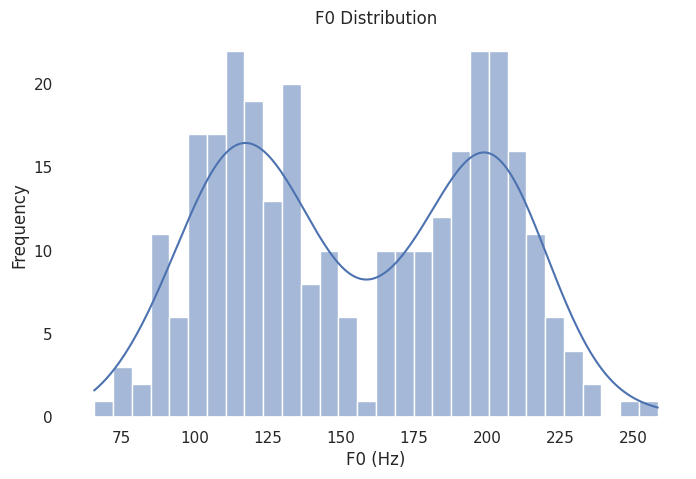

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df, 
    x='f0',
    bins=30,
    kde=True
)
plt.title('F0 Distribution')
plt.xlabel('F0 (Hz)')
plt.ylabel('Frequency')

Text(0, 0.5, 'F0 (Hz)')

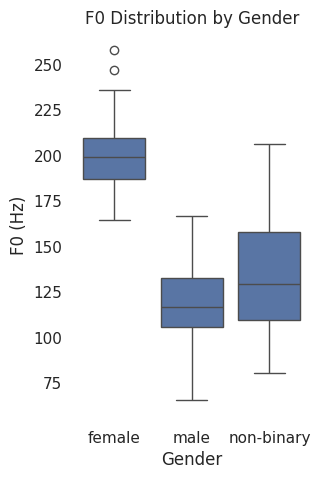

In [20]:
plt.figure(figsize=(3, 5))
sns.boxplot(data=df, x='gender', y='f0')
plt.title('F0 Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('F0 (Hz)')

Text(0, 0.5, 'F0 (Hz)')

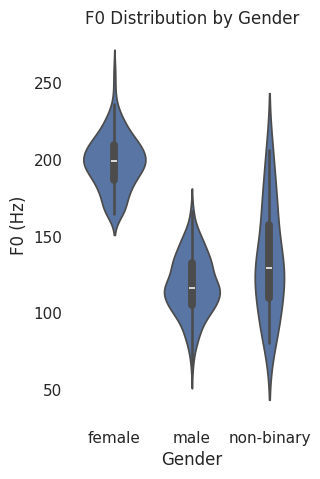

In [21]:
plt.figure(figsize=(3, 5))
sns.violinplot(
    data=df,
    x='gender',
    y='f0'
)
plt.title('F0 Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('F0 (Hz)')


In [24]:
df_ko = pd.read_csv('../data/vowel/vot-f0.csv')
print(df_ko.sample(5, random_state=1067))

      sid  gender  utterance   onset        vot          f0
1233  s34    male  isolation   lenis  56.978913  118.592481
170   s04  female   sentence   lenis  14.751212  245.319982
168   s04  female   sentence   lenis  38.914910  194.417751
883   s24    male   sentence  fortis  14.062720  222.403187
1225  s34    male  isolation  fortis   8.213496  143.648221


Text(0, 0.5, 'F0 (Hz)')

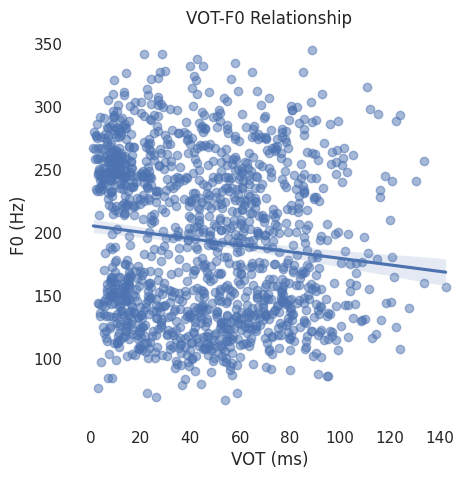

In [25]:
# 산점도와 회귀선
plt.figure(figsize=(5, 5))
sns.regplot(data=df_ko, x='vot', y='f0', scatter_kws={'alpha': 0.5})
plt.title('VOT-F0 Relationship')
plt.xlabel('VOT (ms)')
plt.ylabel('F0 (Hz)')

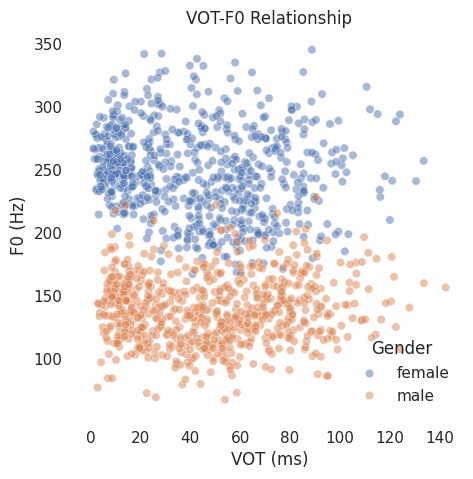

In [33]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_ko, x='vot', y='f0', hue='gender', alpha=0.5)
plt.title('VOT-F0 Relationship')
plt.xlabel('VOT (ms)')
plt.ylabel('F0 (Hz)')
plt.legend(title='Gender', framealpha=0)

In [ ]:
df_ko_f = df_ko[df_ko['gender']=='female']

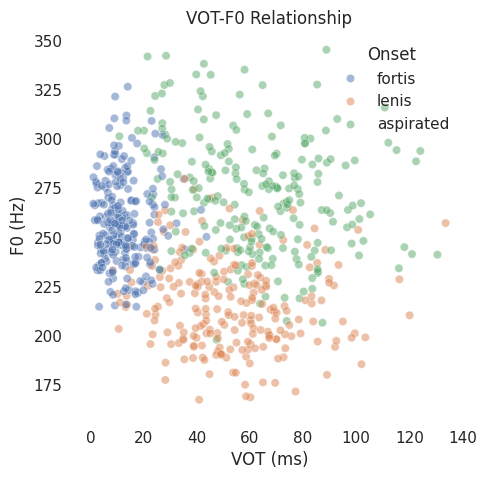

In [51]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_ko_f, x='vot', y='f0', hue='onset', alpha=0.5)
plt.title('VOT-F0 Relationship')
plt.xlabel('VOT (ms)')
plt.ylabel('F0 (Hz)')
plt.legend(title='Onset', framealpha=0)

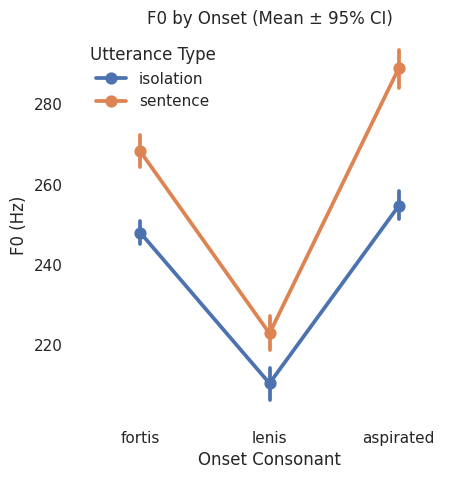

In [52]:
plt.figure(figsize=(5, 5))
sns.pointplot(
    data=df_ko_f,
    x='onset',
    y='f0',
    hue='utterance',
    errorbar=('ci', 95)  # 95% 신뢰구간
)
plt.title('F0 by Onset (Mean ± 95% CI)')
plt.xlabel('Onset Consonant')
plt.ylabel('F0 (Hz)')
plt.legend(title='Utterance Type', framealpha=0)

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 42.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='onset', ylabel='vot'>

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


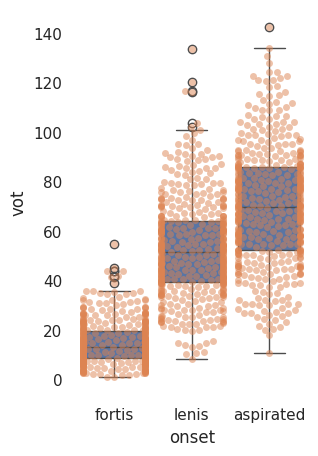

In [30]:
fig, ax = plt.subplots(figsize=(3, 5))

# Box plot (배경)
sns.boxplot(
    data=df_ko,
    x='onset',
    y='vot',
    ax=ax,
)

# Swarm plot (개별 데이터 포인트)
sns.swarmplot(
    data=df_ko,
    x='onset',
    y='vot',
    alpha=0.5,
    ax=ax
)

Text(0.5, 1.2, 'VOT-F0 Joint Distribution')

<Figure size 500x500 with 0 Axes>

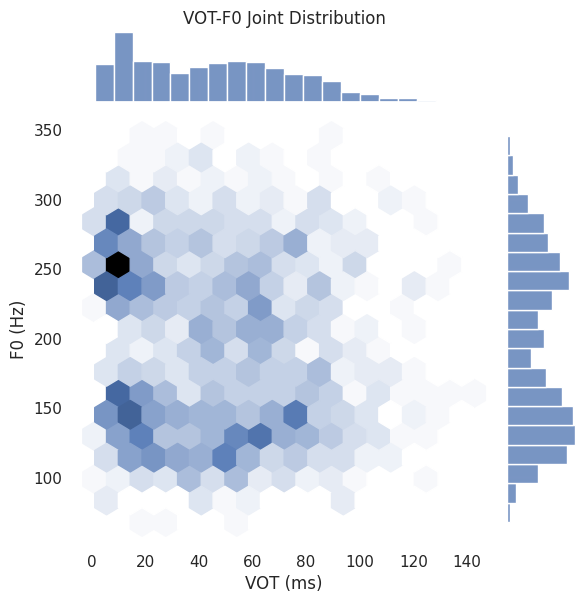

In [45]:
plt.figure(figsize=(5, 5))
# Joint plot 생성
sns.jointplot(
    data=df_ko,
    x='vot',
    y='f0',
    kind='hex',  # hexbin
    marginal_kws={'bins': 20}
)
plt.xlabel('VOT (ms)')
plt.ylabel('F0 (Hz)')
plt.title('VOT-F0 Joint Distribution', y=1.2)

In [17]:
# 데이터 준비 (피벗 테이블)
pivot_data = data_female.pivot_table(
    values='f0',
    index='sid',
    columns='onset'
    # aggfunc='mean'
)
pivot_data

# # Cluster map 생성
# g = sns.clustermap(
#     pivot_data,
#     cmap='viridis',
#     figsize=(10, 8),
#     method='ward',  # 계층적 군집화 방법
#     metric='euclidean'  # 거리 측정 방법
# )
# plt.title('화자별 모음 F0 패턴 (군집화)')

onset,Aspirated,Fortis,Lenis
sid,,,
S001,202.851444,NaN,NaN
S002,NaN,229.684722,NaN
S003,203.820893,NaN,NaN
S004,NaN,232.728176,NaN
S005,192.480203,NaN,NaN
...,...,...,...
S132,NaN,NaN,177.664664
S133,NaN,NaN,173.585210
S134,200.559017,NaN,NaN
